<br>
<br>
<p style="font-size:30px;text-align:center;">Insurance Exploratory Data Analysis</p>
    
<p style="font-size:30px;text-align:center;">Manuela da Cruz Chadreque</p>

<p style="font-size:30px;text-align:center;">05 Dezember 2020 </p>
<br>
<br>

<p style="font-size:30px;text-align:center;">Exploratory Data Analysis</p>

Our main goal in this project is to implement a exploratory data analysis to a insurance data source. to achieve this goal we will follow the bellow steps:

Step 1: Understand the Context

Step 2: Sourcing and Setup

Step 3: Cleaning

Step 4: Visualization

Step 5: Analyzing trends, patterns, and relationships in the Data.

## Understand the Context

## Setup and Sourcing

### Setup: Importing necessary libraries

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

### Sourcing: Bring data to the system

In [16]:
# Read the Dataset
insurance_df = pd.read_csv("insurance-data.csv")

## Cleaning da Data

        a. Fix Rows and Columns
		b. Fix Missing Values
		c. Standardize Values
		d. Fix Invalid Values
        e. Filter data

In [17]:
#Display the first five dataset

insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [18]:
#Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analysis:

    The data consist of 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type (Strings in the column)
    
    We can see that there are no missing values

#### Fix Missing Values

In [19]:
# Check for the null values 

insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


We confirm that there are no missing values

#### Fix Outliers

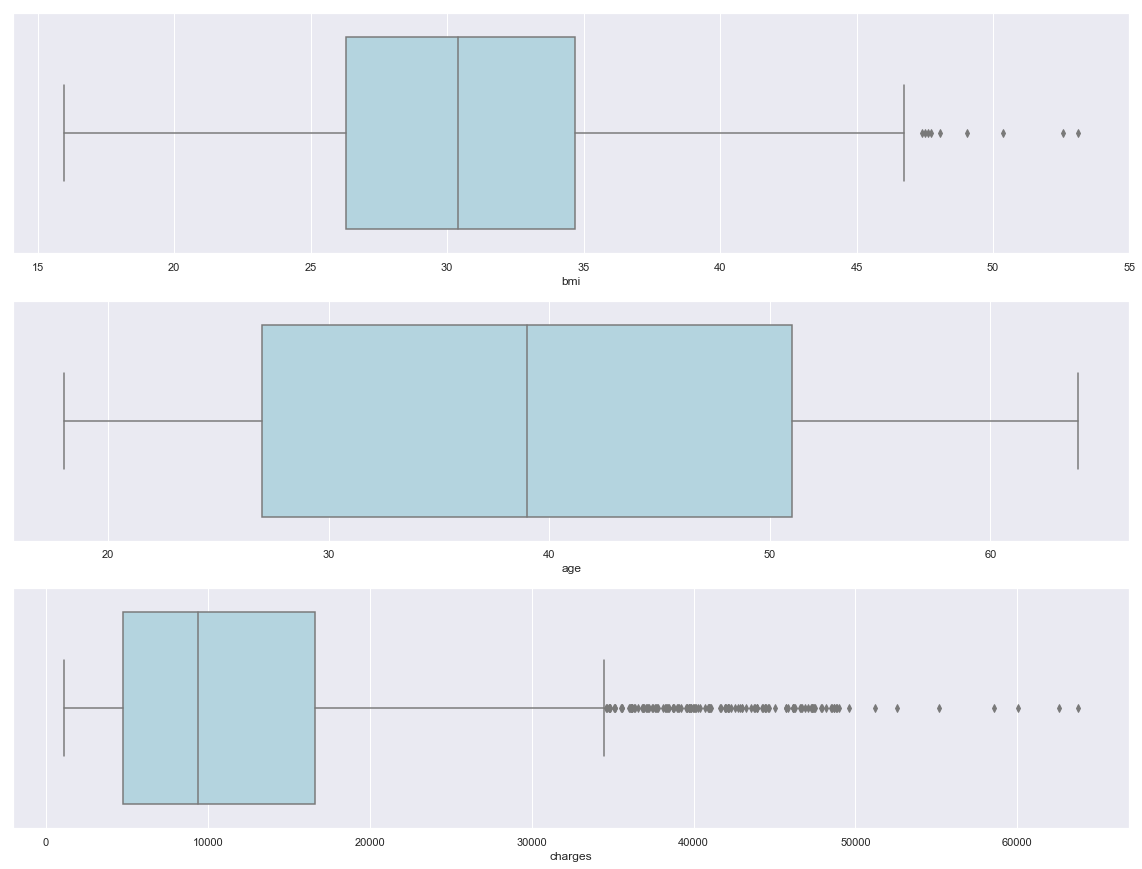

In [20]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.charges, color='lightblue')

plt.show()

- bmi has a few extreme values.

- charges as it is highly skewed, there are quiet a lot of extreme values.

In [21]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Analysis:

- All the statistics seem reasonable.

- Age column: data looks representative of the true age distribution of the adult population with (39) mean.

- Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

## Creating visual methods to analyze the data.

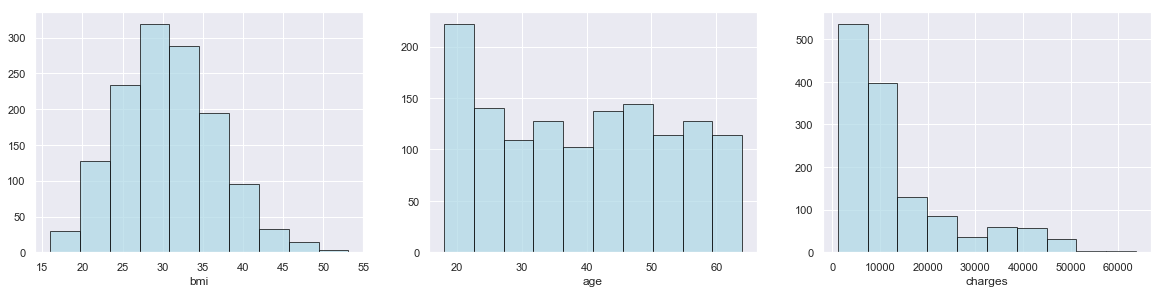

In [39]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

Analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed.

- As seen in the previous step, charges are highly skewed.

In [40]:
# showing the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

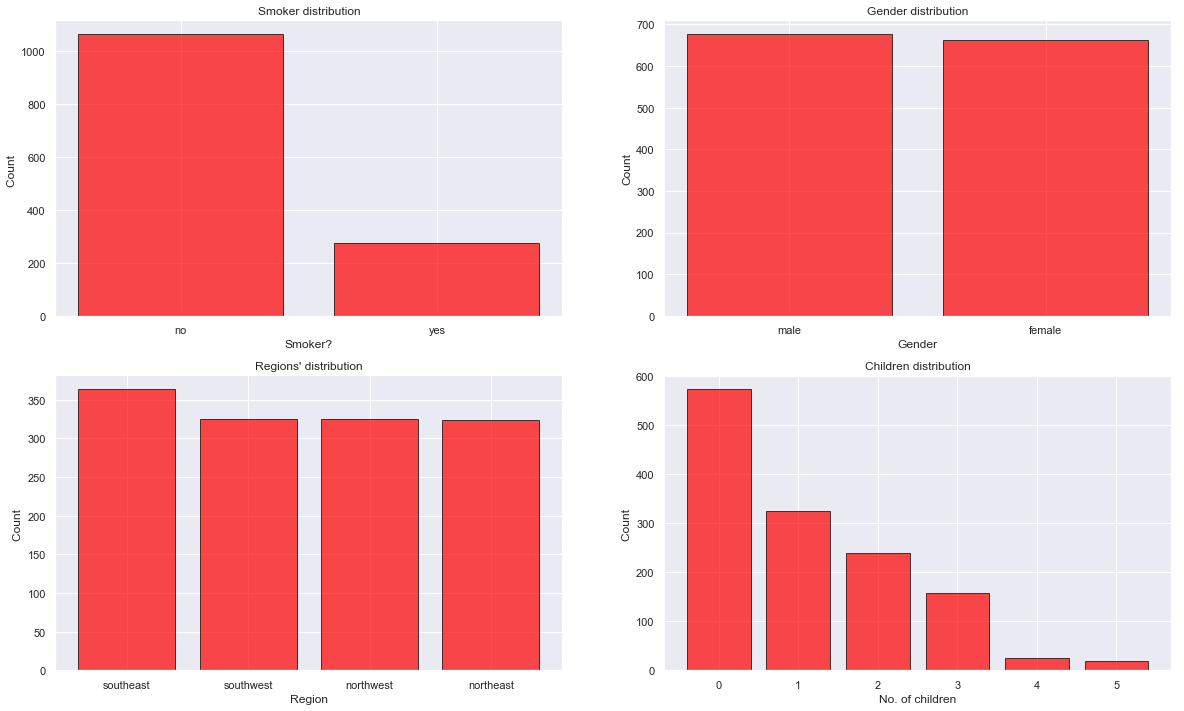

In [41]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))


x = insurance_df.smoker.value_counts().index    #Values for x-axis
y = [insurance_df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = insurance_df.region.value_counts().index    #Values for x-axis
y2 = [insurance_df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = insurance_df.children.value_counts().index    #Values for x-axis
y3 = [insurance_df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

Analysis:

- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

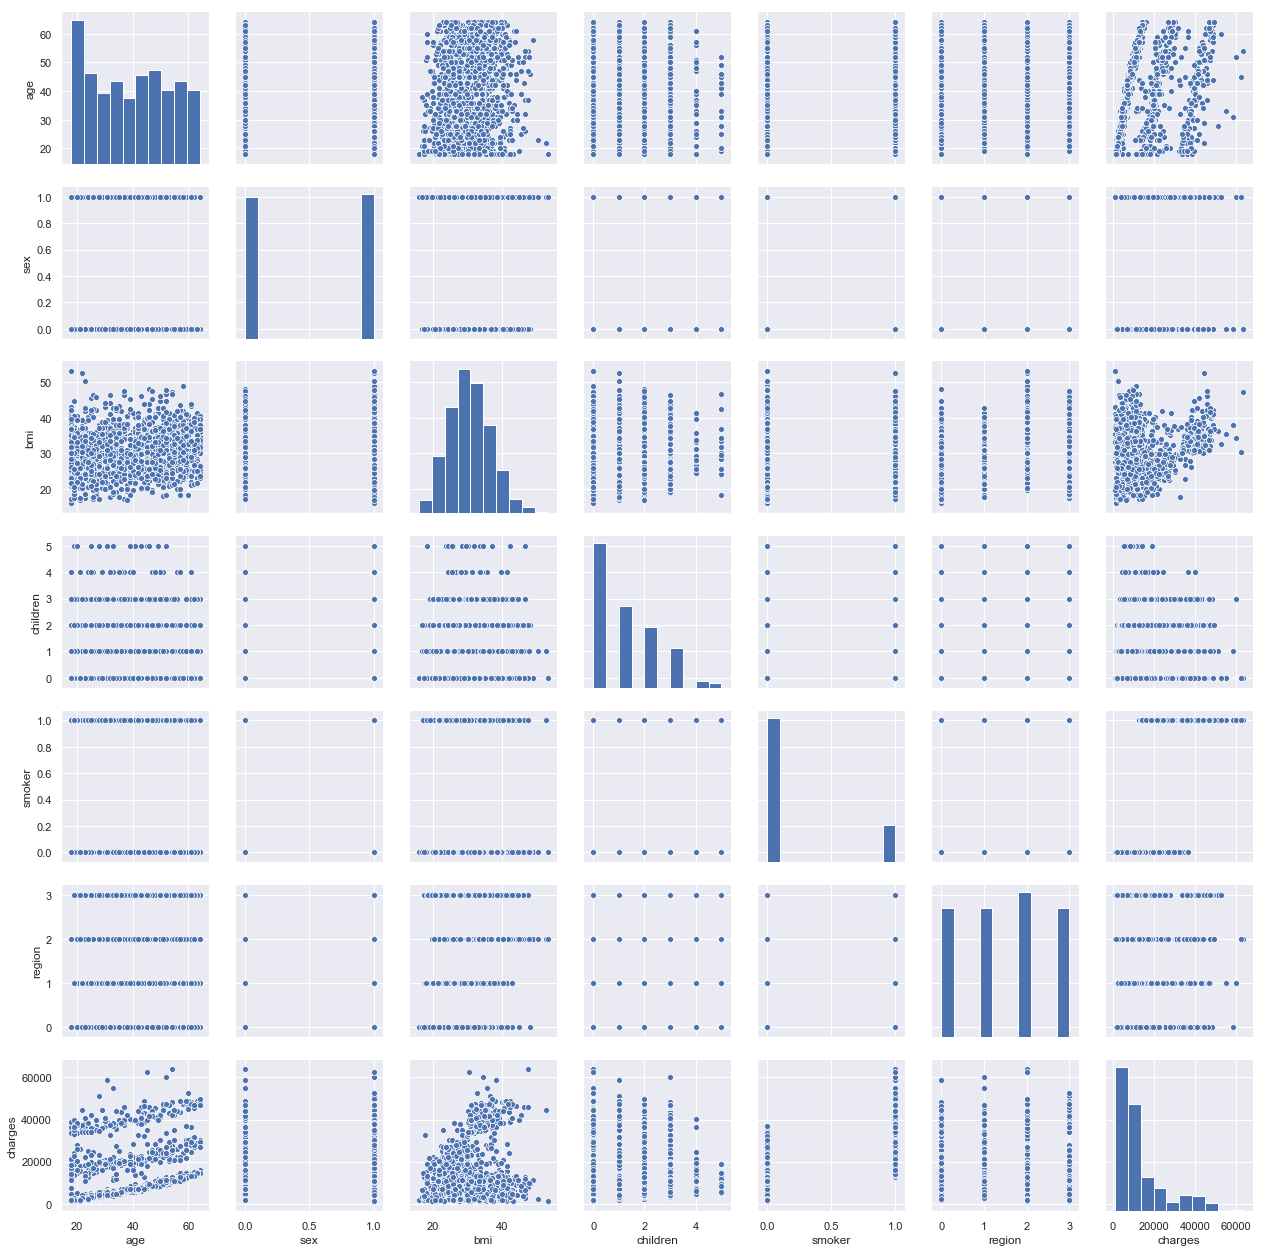

In [42]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()

Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

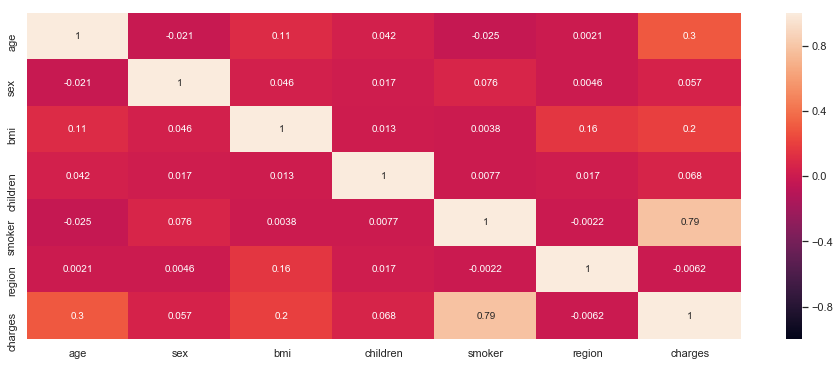

In [62]:
plt.figure(figsize=(16, 6))
sns.heatmap(insurance_df_encoded.corr(), vmin=-1, vmax=1, annot=True)

Analysis:

- There is an obvious correlation between 'charges' and 'smoker' (r=0.79);




## Analyzing trends, patterns, and relationships in the Data.

In [43]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

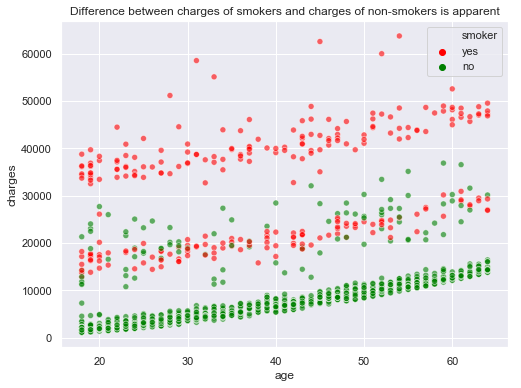

In [44]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

Analysis:

    - Looks like smokers are charged more than non smokers
    - Looks like older people are charged more than the younger ones

## Ansering some questions:Inference

In [63]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Thus, Smokers seem to claim significantly more money than non-smokers

In [47]:
#Does bmi of males differ significantly from that of females?
print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [48]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


bmi of both the genders are identical


In [49]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females

In [50]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


Region has no effect on smoking habits as the p_value (0.062) > 0.05


*Smoking habbits of people of different regions are similar*

In [51]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
